In [1]:
!git clone https://github.com/otenim/Xception-with-Your-Own-Dataset.git

Cloning into 'Xception-with-Your-Own-Dataset'...
remote: Enumerating objects: 271, done.
remote: Total 271 (delta 0), reused 0 (delta 0), pack-reused 271
Receiving objects: 100% (271/271), 236.66 KiB | 18.20 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/Xception-with-Your-Own-Dataset/

/content/Xception-with-Your-Own-Dataset


In [6]:
import os

a = open("classes.txt", "w")
for i in os.listdir("/content/drive/My Drive/cropped_faces/"):
  print(i)
  a.write(i + os.linesep)
a.close()

Alan Arkin
Andie MacDowell
vishal
Amber Heard
Alexander Skarsgard
nitesh
Aaron Taylor-Johnson
Adam Sandler
Akemi Darenogare
Adele
Ali Larter
Alx James
Al Pacino
Alessandra Ambrosio
kalpit
Amy Schumer
Alec Baldwin
Anderson Cooper
Adrianne Palicki
Aaron Paul
Al Roker
Alan Alda
Alexandra Daddario
Albert Brooks
Abigail Breslin
Adriana Lima
Adriana Barraza
Amanda Bynes
Albert Finney
Amy Adams
Amanda Crew
Alan Rickman
Alice Eve
Aaron Judge
Andreea Diaconu
Analeigh Tipton
aswin
Amy Ryan
Alex Pettyfer
Amanda Peet
Amanda Seyfried


In [8]:
!python fine_tune.py /content/drive/My\ Drive/cropped_faces /content/Xception-with-Your-Own-Dataset/classes.txt /content/drive/My\ Drive/xception_classifier --epochs_pre 10 --epochs_fine 20 --lr_pre 5e-3 --lr_fine 5e-4

Using TensorFlow backend.
Training on 2311 images and labels
Validation on 578 images and labels






2019-12-26 11:42:50.800358: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-12-26 11:42:50.804565: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1fcabc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-12-26 11:42:50.804599: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-12-26 11:42:50.844878: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-26 11:42:51.043021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-26 11:42:51.043543: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1fcad80 init

In [15]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

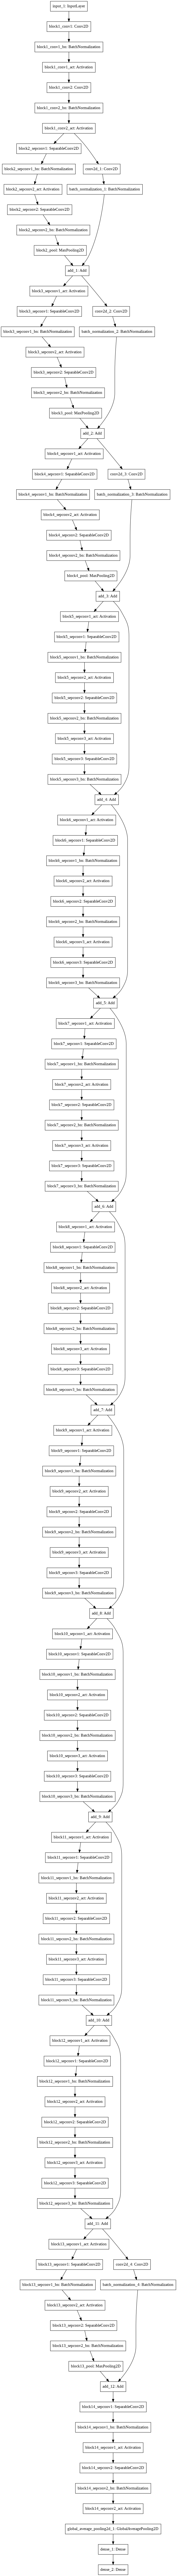

In [17]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [18]:
import argparse
import numpy as np
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.models import load_model


model_path="/content/drive/My Drive/xception_classifier/model_fine_final.h5"
classes_path="/content/Xception-with-Your-Own-Dataset/classes.txt"
core_path="/content/drive/My Drive/cropped_faces_test/"
top_n=1
model = load_model(model_path)

for i in os.listdir(core_path):
  root_path=core_path+i+"/"
  for j in os.listdir(root_path):
    image_path=root_path+j
    # load class names
    classes = []
    with open(classes_path, 'r') as f:
        classes = list(map(lambda x: x.strip(), f.readlines()))

    # load an input image
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # predict
    pred = model.predict(x)[0]
    result = [(classes[i], float(pred[i]) * 100.0) for i in range(len(pred))]
    result.sort(reverse=True, key=lambda x: x[1])
    print(image_path)
    for i in range(top_n):
        (class_name, prob) = result[i]
        print("Top %d ====================" % (i + 1))
        print("Class name: %s" % (class_name))
        print("Probability: %.2f%%" % (prob))


/content/drive/My Drive/cropped_faces_test/Andie MacDowell/cropped125.jpg
Top 1 ====================
Class name: Andie MacDowell
Probability: 100.00%
/content/drive/My Drive/cropped_faces_test/Andie MacDowell/cropped700.jpg
Top 1 ====================
Class name: Andie MacDowell
Probability: 100.00%
/content/drive/My Drive/cropped_faces_test/Andie MacDowell/cropped760.jpg
Top 1 ====================
Class name: Andie MacDowell
Probability: 100.00%
/content/drive/My Drive/cropped_faces_test/Andie MacDowell/cropped563.jpg
Top 1 ====================
Class name: Andie MacDowell
Probability: 100.00%
/content/drive/My Drive/cropped_faces_test/Andie MacDowell/cropped533.jpg
Top 1 ====================
Class name: Andie MacDowell
Probability: 100.00%
/content/drive/My Drive/cropped_faces_test/Andie MacDowell/cropped538.jpg
Top 1 ====================
Class name: Andie MacDowell
Probability: 100.00%
/content/drive/My Drive/cropped_faces_test/Andie MacDowell/cropped510.jpg
Top 1 ====================

In [11]:
!python inference.py /content/drive/My\ Drive/xception_classifier/model_fine_final.h5 /content/Xception-with-Your-Own-Dataset/classes.txt /content/drive/My\ Drive/cropped_faces_test/Alan\ Alda/cropped563.jpg --top_n 1

Using TensorFlow backend.






2019-12-26 12:52:23.297793: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-12-26 12:52:23.297990: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1506d80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-12-26 12:52:23.298021: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-12-26 12:52:23.299779: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-26 12:52:23.420381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-26 12:52:23.421200: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1506f40 initialized for platform CUDA (this does not guarantee that XLA will be use